In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [6]:
# Creating a lit out of lats and lngs from the zip
coordinates = list(lats_lngs)

In [7]:
from citipy import citipy
from datetime import datetime

In [8]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

644

In [9]:
import requests

from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create empty list for city weather data
city_data = []

# print beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counters
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | chernyshevskiy
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | krasnovishersk
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | wamba
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | hauterive
Processing Record 12 of Set 1 | yialos
City not found. Skipping...
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | ixtapa
Processing Record 16 of Set 1 | kaeo
Processing Record 17 of Set 1 | mastic beach
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Re

Processing Record 36 of Set 4 | belomorsk
Processing Record 37 of Set 4 | sensuntepeque
Processing Record 38 of Set 4 | ustka
Processing Record 39 of Set 4 | alekseyevka
Processing Record 40 of Set 4 | mongar
Processing Record 41 of Set 4 | ashqelon
Processing Record 42 of Set 4 | katsuura
Processing Record 43 of Set 4 | havoysund
Processing Record 44 of Set 4 | hualmay
Processing Record 45 of Set 4 | hami
Processing Record 46 of Set 4 | dali
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | port moresby
Processing Record 49 of Set 4 | chuy
Processing Record 50 of Set 4 | goderich
Processing Record 1 of Set 5 | taltal
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | narsaq
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | asayita
City not found. Skipping...
Processing Record 6 of Set 5 | takoradi
Processing Record 7 of Set 5 | abu samrah
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | socor

Processing Record 29 of Set 8 | batagay
Processing Record 30 of Set 8 | pitimbu
Processing Record 31 of Set 8 | nabire
Processing Record 32 of Set 8 | mezhdurechensk
Processing Record 33 of Set 8 | kalmunai
Processing Record 34 of Set 8 | nynashamn
Processing Record 35 of Set 8 | mount pleasant
Processing Record 36 of Set 8 | marienburg
Processing Record 37 of Set 8 | solnechnyy
Processing Record 38 of Set 8 | galgani
City not found. Skipping...
Processing Record 39 of Set 8 | huangnihe
Processing Record 40 of Set 8 | hit
Processing Record 41 of Set 8 | cozumel
Processing Record 42 of Set 8 | svetogorsk
Processing Record 43 of Set 8 | tuatapere
Processing Record 44 of Set 8 | okha
Processing Record 45 of Set 8 | siirt
Processing Record 46 of Set 8 | vardo
Processing Record 47 of Set 8 | usinsk
Processing Record 48 of Set 8 | provideniya
Processing Record 49 of Set 8 | urumqi
Processing Record 50 of Set 8 | atikokan
Processing Record 1 of Set 9 | gurupa
Processing Record 2 of Set 9 | ab

Processing Record 19 of Set 12 | fredericksburg
Processing Record 20 of Set 12 | whangamata
Processing Record 21 of Set 12 | biltine
Processing Record 22 of Set 12 | bathsheba
Processing Record 23 of Set 12 | karaul
City not found. Skipping...
Processing Record 24 of Set 12 | acarau
Processing Record 25 of Set 12 | eureka
Processing Record 26 of Set 12 | pahrump
Processing Record 27 of Set 12 | la plata
Processing Record 28 of Set 12 | santa isabel do rio negro
Processing Record 29 of Set 12 | cairns
Processing Record 30 of Set 12 | sao francisco
Processing Record 31 of Set 12 | yulara
Processing Record 32 of Set 12 | linxia
Processing Record 33 of Set 12 | mana
Processing Record 34 of Set 12 | lunsar
Processing Record 35 of Set 12 | zhuanghe
Processing Record 36 of Set 12 | qafsah
City not found. Skipping...
Processing Record 37 of Set 12 | charters towers
Processing Record 38 of Set 12 | quang ngai
Processing Record 39 of Set 12 | skjervoy
Processing Record 40 of Set 12 | havre-saint

In [13]:
len(city_data)

589

In [21]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,59.00,53,81,15.99,NZ,2021-04-02 00:07:44
1,Jamestown,42.0970,-79.2353,26.01,86,90,19.57,US,2021-04-02 00:07:44
2,Busselton,-33.6500,115.3333,68.00,87,52,3.00,AU,2021-04-02 00:07:45
3,Chernyshevskiy,63.0128,112.4714,-13.50,94,67,3.85,RU,2021-04-02 00:07:45
4,Yellowknife,62.4560,-114.3525,17.60,93,90,11.50,CA,2021-04-02 00:07:45
5,Krasnovishersk,60.4078,57.0820,31.78,98,100,7.02,RU,2021-04-02 00:07:46
6,Dikson,73.5069,80.5464,-10.19,81,100,6.89,RU,2021-04-02 00:07:46
7,Wamba,8.9333,8.6000,78.84,17,82,5.19,NG,2021-04-02 00:07:46
8,Sao Filipe,14.8961,-24.4956,71.78,77,78,9.13,CV,2021-04-02 00:07:46
9,Kapaa,22.0752,-159.3190,80.60,61,40,16.11,US,2021-04-02 00:07:47


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2021-04-02 00:07:44,-46.2817,169.8464,59.00,53,81,15.99
1,Jamestown,US,2021-04-02 00:07:44,42.0970,-79.2353,26.01,86,90,19.57
2,Busselton,AU,2021-04-02 00:07:45,-33.6500,115.3333,68.00,87,52,3.00
3,Chernyshevskiy,RU,2021-04-02 00:07:45,63.0128,112.4714,-13.50,94,67,3.85
4,Yellowknife,CA,2021-04-02 00:07:45,62.4560,-114.3525,17.60,93,90,11.50
...,...,...,...,...,...,...,...,...,...
584,Mitchell,US,2021-04-02 00:11:07,43.7094,-98.0298,59.00,23,1,23.02
585,Parrita,CR,2021-04-02 00:11:08,9.5201,-84.3225,75.20,68,75,20.71
586,Campo Verde,BR,2021-04-02 00:11:08,-20.4167,-54.0667,75.20,60,20,5.75
587,Gilbues,BR,2021-04-02 00:11:08,-9.8317,-45.3439,77.52,71,93,1.95


In [24]:
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

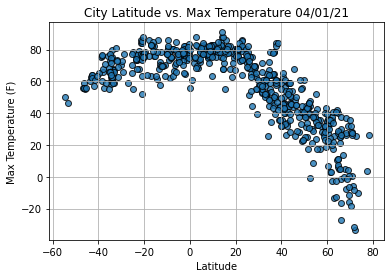

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

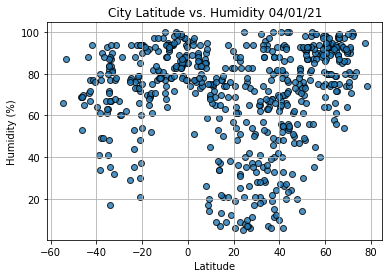

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

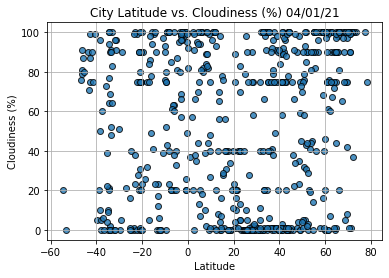

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.

plt.show()

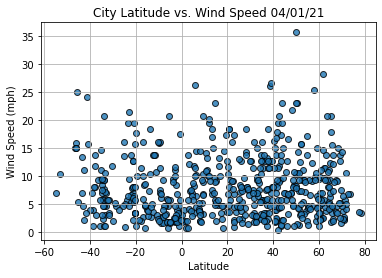

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()